<a href="https://colab.research.google.com/github/Chinhan1532/AI_Homework/blob/main/nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [2]:
data="/content/drive/MyDrive/Flower"

In [3]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices


Found 150 images belonging to 5 classes.


{'APRICOT': 0, 'DAISY': 1, 'LOTUS': 2, 'ROSE': 3, 'WATERLILY': 4}

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [12]:
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train=model.fit(Train,batch_size=128,epochs=20,verbose=1)
test=model.evaluate(Train,verbose=0)
print('Do mat mat:',test[0])
print('Do chinh xac:',test[1])


Epoch 1/20
5/5 [==============================] - 3s 219ms/step - loss: 7.1753e-04 - accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 2s 421ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 2s 387ms/step - loss: 0.0682 - accuracy: 0.9933
Epoch 4/20
5/5 [==============================] - 1s 263ms/step - loss: 0.0074 - accuracy: 0.9933
Epoch 5/20
5/5 [==============================] - 1s 295ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 1s 275ms/step - loss: 0.0830 - accuracy: 0.9867
Epoch 7/20
5/5 [==============================] - 1s 274ms/step - loss: 0.0286 - accuracy: 0.9933
Epoch 8/20
5/5 [==============================] - 1s 240ms/step - loss: 0.0293 - accuracy: 0.9867
Epoch 9/20
5/5 [==============================] - 1s 292ms/step - loss: 2.8722e-04 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 1s 264ms/step - loss: 0.0116 - accuracy: 0.9867
Epoch 11/20

In [15]:
model.save('/content/drive/MyDrive/Colab Notebooks/BT/nhandienhoa.h5')

In [16]:
model_1 = load_model('/content/drive/MyDrive/Colab Notebooks/BT/nhandienhoa.h5')

1/1 [==============================] - 0s 22ms/step
HOA NÀY LÀ : WATER LILY


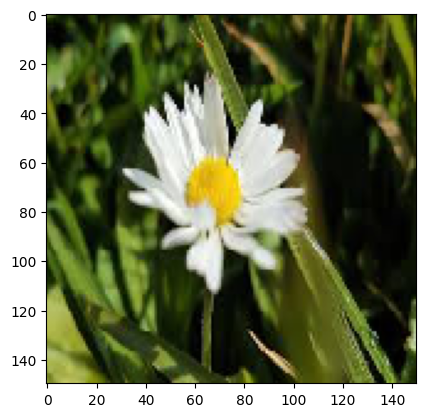

1/1 [==============================] - 0s 19ms/step
HOA NÀY LÀ : ROSE


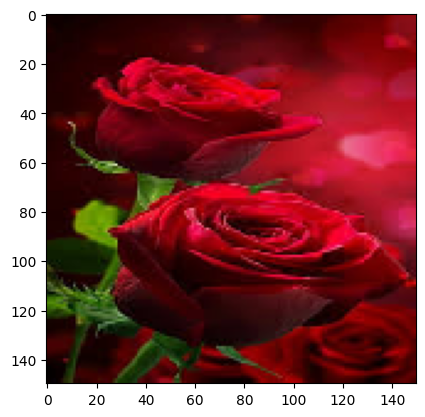

1/1 [==============================] - 0s 19ms/step
HOA NÀY LÀ : APRICOT


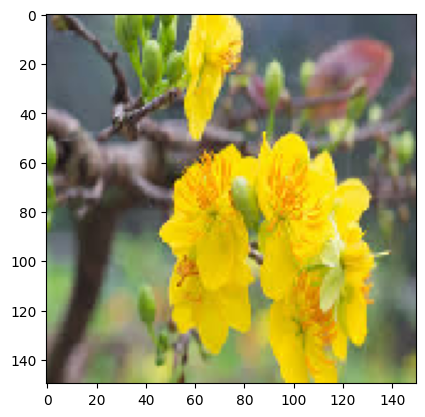

1/1 [==============================] - 0s 19ms/step
HOA NÀY LÀ : DAISY


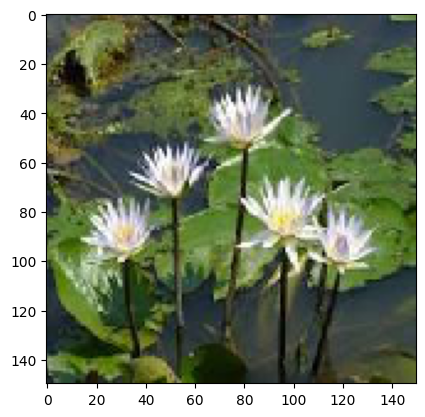

1/1 [==============================] - 0s 20ms/step
HOA NÀY LÀ : DAISY


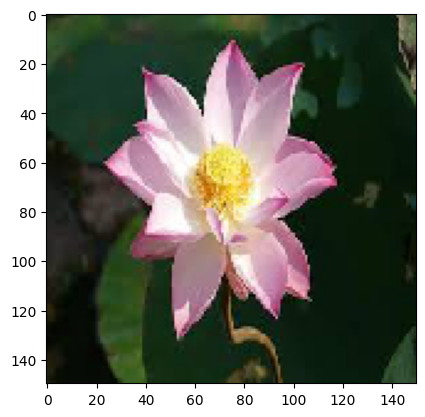

In [26]:
folder='/content/drive/MyDrive/testflower/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['APRICOT', 'DAISY', 'LOTUS', 'ROSE', 'WATER LILY']
  print('HOA NÀY LÀ : {}'.format(class_name[result]))
  plt.show()